In [3]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('../../../data/final_parsed_malt_data_cleaned.csv')
df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp
0,vince huguet,No profile image,Webdesigner,-,499,1.00,1h,['Webdesigner'],['Design'],0,...,Je vous dis bonjour.,0,0,0,vincehuguet,https://www.malt.fr/profile/vincehuguet,2013-02-26,Paris,île-de-france,2013-02-26
1,Stanislas Blaineau,https://dam.malt.com/fgvxeyh2zekvtqqrfbis?grav...,développeur php symphony 2/3/4 - full stack,8-15,400,0.91,4h,"['Développeur Web Back-end', 'Développeur Web ...","['symfony 2/3/4', 'MySQL', 'jQuery', 'Bootstra...",0,...,"Développeur web full-stack PHP depuis 2012, j'...",2,0,0,stanislasblaineau,https://www.malt.fr/profile/stanislasblaineau,2013-09-23,Lyon,auvergne-rhône-alpes,2013-09-23
2,Laura Ferron,https://dam.malt.com/rhqcv7lqrx2p8ujw2bok?grav...,Product designer Senior - UX / UI - Figma,8-15,400,1.00,1h,"['UI Designer', 'UX Designer']","[""design d'interface mobile"", 'Webdesign', 'Us...",1,...,Besoin d'une aide graphique pour un nouveau pr...,18,0,0,lauraferron,https://www.malt.fr/profile/lauraferron,2014-01-18,Paris,île-de-france,2014-01-18
3,Loïc B.,No profile image,DA Web / Chef de projets,-,300,1.00,1h,['Product Manager'],"['E-commerce', 'Wordpress', 'Prestashop', 'Ado...",0,...,Après plusieurs années en agence ( création de...,0,0,0,loicbel,https://www.malt.fr/profile/loicbel,2013-05-22,Toulouse,occitanie,2013-05-22
4,Philippe De Cuzey,https://dam.malt.com/vbjgjtuddc6dxgbk28qj?grav...,data engineer senior,8-15,750,0.50,2h,['Data Engineer'],"['Python', 'Spark', 'SQL', 'noSQL', 'Apache Ka...",0,...,"free lance data engineer, working on Big Data ...",1,0,0,philippedecuzey,https://www.malt.fr/profile/philippedecuzey,2014-01-16,Paris,île-de-france,2014-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178925,Caroline Aubry,https://dam.malt.com/8164ce22-8e98-4d6c-ab00-6...,Designer graphique - Websigner - Graphiste print,15et+,350,1.00,1h,"['Graphiste', 'UX Designer', 'Webdesigner']","['Adobe Photoshop', 'Adobe Illustrator', 'Desi...",0,...,"Designer graphique depuis plus de 15 ans, j'ex...",0,0,0,carolineaubry1,https://www.malt.fr/profile/carolineaubry1,2023-10-23,Lorient,bretagne,2023-10-23
178926,Catarina Marques,https://dam.malt.com/988d7dea-cf3c-4da0-b692-3...,Community manager,0-2,400,1.00,1h,['Community Manager'],"['Community management', 'Réseaux sociaux', 'C...",0,...,NaN,0,0,0,catarinamarques,https://www.malt.fr/profile/catarinamarques,2023-10-25,Houdan,île-de-france,2023-10-25
178927,Samy S.,https://dam.malt.com/24f73853-3e80-4972-a952-f...,Développeur Web,0-2,150,1.00,24h,"['Développeur CMS', 'Développeur Web Back-end'...","['HTML5', 'CSS3', 'Bubble.io', 'JavaScript', '...",0,...,"Développeur web full stack de formation, je ma...",0,0,0,samysebahi,https://www.malt.fr/profile/samysebahi,2023-10-15,Paris,île-de-france,2023-10-15
178928,Ophélie D.,https://dam.malt.com/520ca9da-4784-44c5-9833-7...,Conseil Marketplaces | Mirakl Amazon Cdiscount,3-7,300,1.00,4h,['Chef de projet digital'],"['E-commerce', 'Commerce de détail', 'Marketpl...",0,...,Le saviez-vous ?70% des ventes en ligne se fon...,0,0,0,opheliedelville,https://www.malt.fr/profile/opheliedelville,2023-11-01,Lille,hauts-de-france,2023-11-01


### Number of freelancers through time

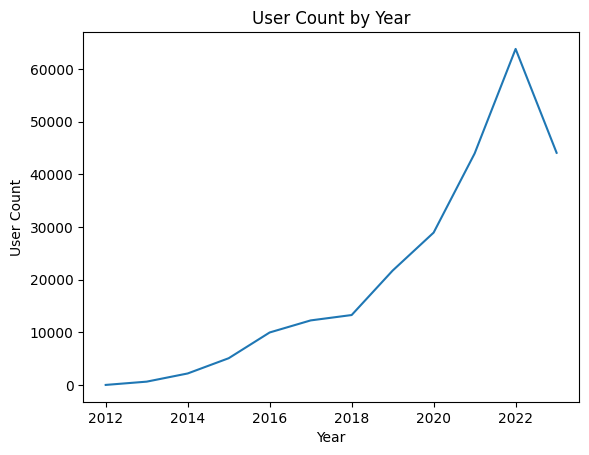

In [2]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%Y-%m-%d')

# get only the year from the date
df['year'] = df['creation_date'].dt.year.astype(str).str[:4]

occurences = df['year'].value_counts()

occurences = occurences.sort_index()

vis = occurences.plot()

# create a new figure
vis.plot()

# add a title and labels
plt.title('User Count by Year')
plt.xlabel('Year')
plt.ylabel('User Count')

# show the plot
plt.show()

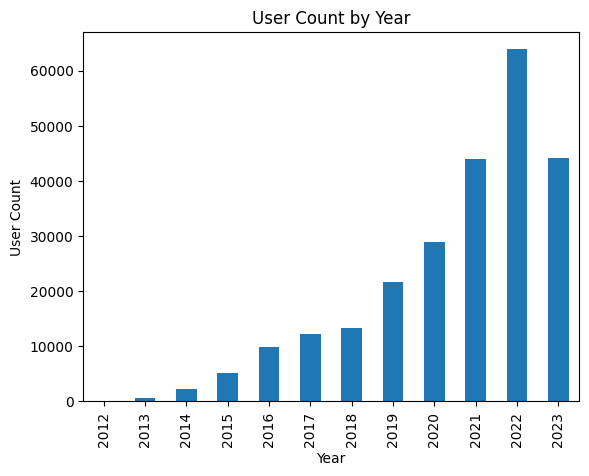

In [ ]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%Y-%m-%d')

df['year'] = df['creation_date'].dt.year.astype(str).str[:4]

# Compter le nombre d'occurrences pour chaque année
occurrences = df['year'].value_counts()

# sort data by year
occurrences = occurrences.sort_index()

# bar plot
occurrences.plot(kind='bar')

# add a title and labels
plt.title('User Count by Year')
plt.xlabel('Year')
plt.ylabel('User Count')

# plot the data
plt.show()

### Number of supermalter in comparison to malter (barplot) > deduce the percentage of supermalter

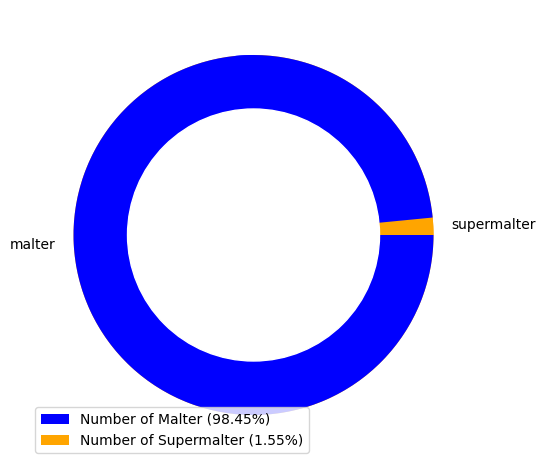

In [ ]:
# Filter the occurrences for 'supermalter' and 'malter'
supermalter_count = df['supermalter'] == 1
malter_count = df['supermalter'] == 0

# Create a new dataframe with the counts
comparison_df = [supermalter_count.sum(), malter_count.sum()]

# calculate percentage of supermalter and malter and round to 2 decimals
supermalter_percentage = supermalter_count.sum() / df.shape[0] * 100
malter_percentage = malter_count.sum() / df.shape[0] * 100
supermalter_percentage = round(supermalter_percentage, 2)
malter_percentage = round(malter_percentage, 2)

# create data
names = ['supermalter', 'malter']

sizes = [supermalter_percentage, malter_percentage]

# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.7, color='white')

labels = ['Number of Malter ('+str(malter_percentage)+'%)', 'Number of Supermalter ('+str(supermalter_percentage)+'%)']
colors = ['blue', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")

# Give color names
plt.pie(comparison_df, labels=names, colors=['orange','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Malter vs Supermalter in User Count')

plt.tight_layout()

# Show the graph
plt.show()

### Number of missions done by malter vs supermalter

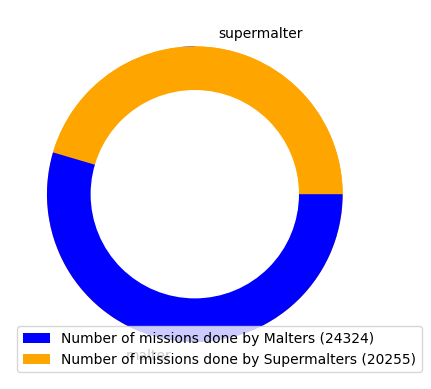

In [ ]:
# Filter the occurrences for 'supermalter' and 'malter'
df_supermalter = df[df['supermalter'] == 1]
df_malter = df[df['supermalter'] == 0]

# Create a new dataframe with the counts
supermalter_mission_count = df_supermalter['missions'].sum()
malter_mission_count = df_malter['missions'].sum()

comparison_df = [supermalter_mission_count, malter_mission_count]

# create data
names = ['supermalter', 'malter']

# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.7, color='white')

labels = ['Number of missions done by Malters ('+str(malter_mission_count)+')', 'Number of missions done by Supermalters ('+str(supermalter_mission_count)+')']
colors = ['blue', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")


# Give color names
plt.pie(comparison_df, labels=names, colors=['orange','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()